# OLS (Linear Regression)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

from plotnine import *
%matplotlib inline

In [34]:
url = 'https://raw.githubusercontent.com/mwaugh0328/Data_Bootcamp_Fall_2017/master/data_bootcamp_1127/trump_data.csv'
df = pd.read_csv(url,encoding='latin-1',index_col=0)
df = df.dropna(subset=['income'])

In [35]:
df.head()

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share
0,55221.0,51281.0,"Autauga County, Alabama",1,1,1001.0,AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358
5,195121.0,50254.0,"Baldwin County, Alabama",3,1,1003.0,AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515
10,26932.0,32964.0,"Barbour County, Alabama",5,1,1005.0,AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both,0.522714
15,22604.0,38678.0,"Bibb County, Alabama",7,1,1007.0,AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both,0.769662
20,57710.0,45813.0,"Blount County, Alabama",9,1,1009.0,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both,0.898519


Linear regression is a methodology that can be used for either prediction or causal analysis depending on how it is designed. For now we will use it for prediction. 

The way it works is that we assume that there is a linear expression of one variable $y$ called the 'dependent' or 'outcome', based on other ones called the 'independent variables' $X$ and some unobservables $\varepsilon$

$$y=\beta_0+\beta_1 X+\varepsilon$$


By finding the values of $\beta_0$ and $\beta_1$ that best solve for the group of equations we can find with data for $y$ and $X$, we can then predict what values of $y$ would be if we had some hypothetical values of $X$ not in the data.

While it seems that this form is very restrictive, $X$ can take any transformation of a variable, including polynomials, sines and others that while being written in linear form, don't necessarily generate straight lines. 


We are going to look at the 2016 election data to see if we can predict the share of voters for Trump in a county using the average income for it.

$$y=\beta_0+\beta_1 X+\varepsilon$$

$$\frac{dy}{dX}=\beta_1$$




In [36]:
# y is trump_share, X is income

reg1 = smf.ols('trump_share ~ income',df).fit()

In [37]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trump_share   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.62e-26
Time:                        18:29:46   Log-Likelihood:                 1416.5
No. Observations:                3111   AIC:                            -2829.
Df Residuals:                    3109   BIC:                            -2817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7499      0.011     68.508      0.000       0.728       0.771
income     -2.442e-06   2.27e-07    -10.756      0.000   -2.89e-06      -2e-06
==============================================================================
Omnibus:                      334.967   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.679
Skew:                          -0.875   Prob(JB):                     5.04e-99
Kurtosis:                       3.657   Cond. No.                     1.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#OK, so how do we know what are the betas?

reg1.params

Intercept    0.749897
income      -0.000002
dtype: float64

Intercept is $\hat{\beta}_0$ the estimate for $\beta_0$, and income is $\hat{\beta}_1$ the estimate for $\beta_1$

If we wanted to see all predicted values of $y$ if we fed the same values of $X$ to our equation we could do this

In [39]:
df['preds_reg1']=reg1.predict()

In [40]:
df.head()

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share,preds_reg1
0,55221.0,51281.0,"Autauga County, Alabama",1,1,1001.0,AL,alabama,1001,Autauga,24661,GOP,Trump,18110.0,both,0.734358,0.624668
5,195121.0,50254.0,"Baldwin County, Alabama",3,1,1003.0,AL,alabama,1003,Baldwin,94090,GOP,Trump,72780.0,both,0.773515,0.627176
10,26932.0,32964.0,"Barbour County, Alabama",5,1,1005.0,AL,alabama,1005,Barbour,10390,GOP,Trump,5431.0,both,0.522714,0.669398
15,22604.0,38678.0,"Bibb County, Alabama",7,1,1007.0,AL,alabama,1007,Bibb,8748,GOP,Trump,6733.0,both,0.769662,0.655445
20,57710.0,45813.0,"Blount County, Alabama",9,1,1009.0,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0,both,0.898519,0.638021


In [41]:
# We will sort the dataframe by the values of income so we
# can plot easily


df.sort_values(by='trump_share', inplace=True)

df.head()

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share,preds_reg1
1450,647484.0,70848.0,"District of Columbia, District of Columbia",1,11,11001.0,DC,district-of-columbia,11001,District of Columbia,280272,GOP,Trump,11553.0,both,0.041221,0.576885
11910,14153.0,26369.0,"Oglala Lakota County, South Dakota",102,46,46102.0,SD,south-dakota,46102,Oglala Lakota,2896,GOP,Trump,241.0,both,0.083218,0.685503
5890,892816.0,74260.0,"Prince George's County, Maryland",33,24,24033.0,MD,maryland,24033,Prince George's,351091,GOP,Trump,29290.0,both,0.083426,0.568552
9000,1428357.0,34299.0,"Bronx County, New York",5,36,36005.0,NY,new-york,36005,Bronx,358857,GOP,Trump,34424.0,both,0.095927,0.666138
970,840763.0,81294.0,"San Francisco County, California",75,6,6075.0,CA,california,6075,San Francisco,267584,GOP,Trump,26461.0,both,0.098889,0.551375


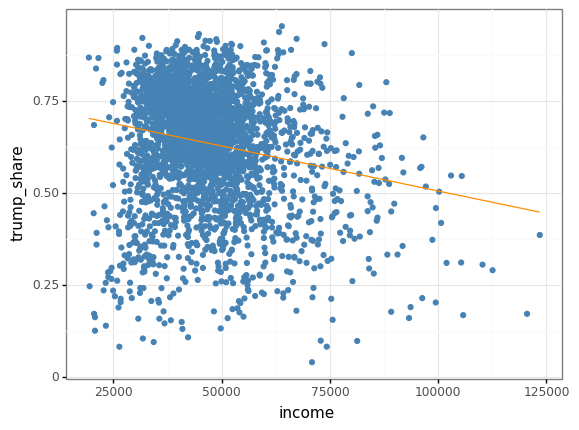

<ggplot: (8782336446347)>

In [42]:
(ggplot(df, aes(x='income', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='income', y='preds_reg1'), color='darkorange' )+
 theme_bw()
       )

This doesn't look like it did very well... maybe we can use a different independent variable like population

In [43]:
reg2 = smf.ols('trump_share ~ population',df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trump_share   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     425.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.31e-88
Time:                        18:36:08   Log-Likelihood:                 1559.0
No. Observations:                3111   AIC:                            -3114.
Df Residuals:                    3109   BIC:                            -3102.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6529      0.003    237.004      0.000       0.648       0.658
population -1.671e-07    8.1e-09    -20.615      0.000   -1.83e-07   -1.51e-07
==============================================================================
Omnibus:                      314.145   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.350
Skew:                          -0.575   Prob(JB):                    1.32e-175
Kurtosis:                       5.211   Cond. No.                     3.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
df['preds_reg2']=reg2.predict()



In [45]:
df.head()

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share,preds_reg1,preds_reg2
1450,647484.0,70848.0,"District of Columbia, District of Columbia",1,11,11001.0,DC,district-of-columbia,11001,District of Columbia,280272,GOP,Trump,11553.0,both,0.041221,0.576885,0.544739
11910,14153.0,26369.0,"Oglala Lakota County, South Dakota",102,46,46102.0,SD,south-dakota,46102,Oglala Lakota,2896,GOP,Trump,241.0,both,0.083218,0.685503,0.650539
5890,892816.0,74260.0,"Prince George's County, Maryland",33,24,24033.0,MD,maryland,24033,Prince George's,351091,GOP,Trump,29290.0,both,0.083426,0.568552,0.503756
9000,1428357.0,34299.0,"Bronx County, New York",5,36,36005.0,NY,new-york,36005,Bronx,358857,GOP,Trump,34424.0,both,0.095927,0.666138,0.414292
970,840763.0,81294.0,"San Francisco County, California",75,6,6075.0,CA,california,6075,San Francisco,267584,GOP,Trump,26461.0,both,0.098889,0.551375,0.512451


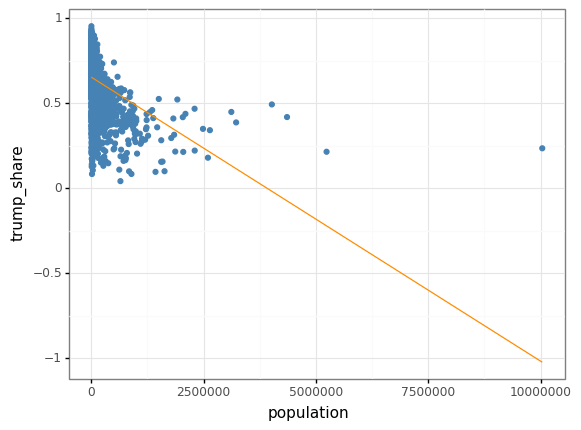

<ggplot: (8782336838337)>

In [46]:
(ggplot(df, aes(x='population', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='population', y='preds_reg2'), color='darkorange' )+
 theme_bw()
       )

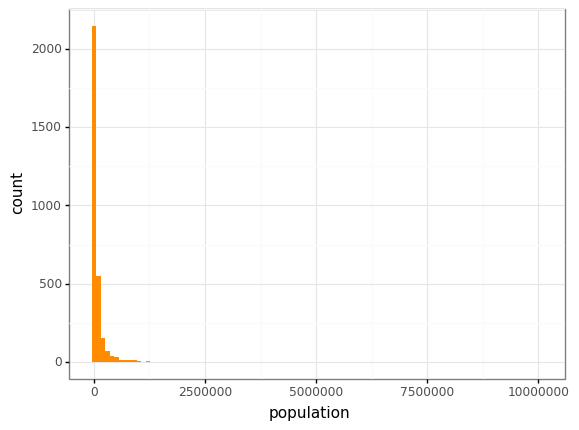

<ggplot: (8782357470461)>

In [47]:
# Let's look at the distribution of population


(ggplot(df, aes(x='population'))+
geom_histogram(fill='darkorange', bins=100)+
 theme_bw()
)

In [48]:
np.log(1000)-np.log(100)

2.302585092994045

In [49]:
np.log(10000)-np.log(1000)

2.302585092994047

/Users/pablocrespo/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 43'. Pick better value with 'binwidth'.


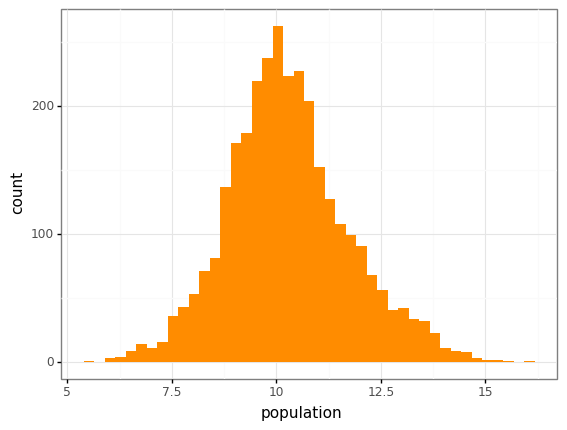

<ggplot: (8782357469582)>

In [50]:
(ggplot(df, aes(x=np.log(df['population'])))+
 geom_histogram(fill='darkorange')+
 theme_bw()
)

In [51]:
#Let's make a new variable and see if it works better

df['lnpop']=np.log(df['population'])

In [52]:
reg3 = smf.ols('trump_share ~ lnpop',df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trump_share   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     1045.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          8.11e-198
Time:                        18:41:14   Log-Likelihood:                 1810.3
No. Observations:                3111   AIC:                            -3617.
Df Residuals:                    3109   BIC:                            -3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1865      0.017     68.952      0.000       1.153       1.220
lnpop         -0.0535      0.002    -32.319      0.000      -0.057      -0.050
==============================================================================
Omnibus:                      496.680   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              824.938
Skew:                          -1.057   Prob(JB):                    7.36e-180
Kurtosis:                       4.376   Cond. No.                         74.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
df['preds_reg3']=reg3.predict()


In [54]:
df.head()

,population,income,NAME,county,state,FIPS,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount,_merge,trump_share,preds_reg1,preds_reg2,lnpop,preds_reg3
1450,647484.0,70848.0,"District of Columbia, District of Columbia",1,11,11001.0,DC,district-of-columbia,11001,District of Columbia,280272,GOP,Trump,11553.0,both,0.041221,0.576885,0.544739,13.380849,0.470293
11910,14153.0,26369.0,"Oglala Lakota County, South Dakota",102,46,46102.0,SD,south-dakota,46102,Oglala Lakota,2896,GOP,Trump,241.0,both,0.083218,0.685503,0.650539,9.557682,0.674939
5890,892816.0,74260.0,"Prince George's County, Maryland",33,24,24033.0,MD,maryland,24033,Prince George's,351091,GOP,Trump,29290.0,both,0.083426,0.568552,0.503756,13.702136,0.453095
9000,1428357.0,34299.0,"Bronx County, New York",5,36,36005.0,NY,new-york,36005,Bronx,358857,GOP,Trump,34424.0,both,0.095927,0.666138,0.414292,14.172035,0.427943
970,840763.0,81294.0,"San Francisco County, California",75,6,6075.0,CA,california,6075,San Francisco,267584,GOP,Trump,26461.0,both,0.098889,0.551375,0.512451,13.642065,0.456311


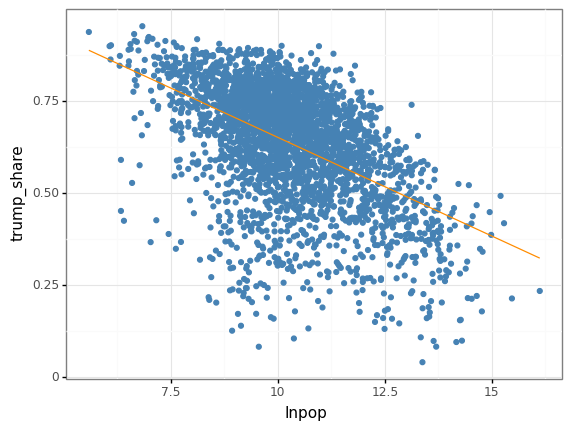

<ggplot: (8782357502202)>

In [55]:
(ggplot(df, aes(x='lnpop', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='lnpop', y='preds_reg3'), color='darkorange' )+
 theme_bw()
       )

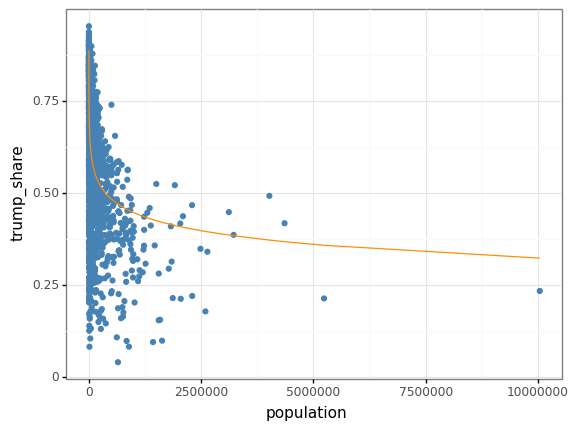

<ggplot: (8782357611162)>

In [56]:
#This looks a lot better! I want to check something though

(ggplot(df, aes(x='population', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='population', y='preds_reg3'), color='darkorange')+
 theme_bw()
       )

In [57]:
#we can assess the fit with the R squared, the closest it is to
#to one, the better the fit

print('reg with just income R squared is:', reg1.rsquared)
print('reg with just population R squared is:', reg2.rsquared)
print('reg with just log population R squared is:', reg3.rsquared)



reg with just income R squared is: 0.03587435917907322
reg with just population R squared is: 0.12025481319625597
reg with just log population R squared is: 0.251474741002481


In [58]:
# so we see we are doing better. Let's do one more

reg4 = smf.ols('trump_share ~ income+lnpop',df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            trump_share   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     522.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.13e-196
Time:                        18:48:14   Log-Likelihood:                 1810.3
No. Observations:                3111   AIC:                            -3615.
Df Residuals:                    3108   BIC:                            -3596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1876      0.018     67.778      0.000       1.153       1.222
income     -6.756e-08   2.15e-07     -0.314      0.754    -4.9e-07    3.54e-07
lnpop         -0.0533      0.002    -29.922      0.000      -0.057      -0.050
==============================================================================
Omnibus:                      499.492   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.280
Skew:                          -1.061   Prob(JB):                    1.87e-181
Kurtosis:                       4.386   Cond. No.                     3.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
df['preds_reg4']=reg4.predict()

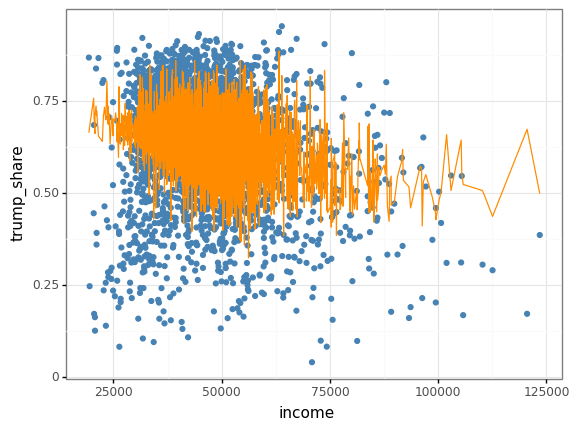

<ggplot: (8782337193147)>

In [60]:
(ggplot(df, aes(x='income', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='income', y='preds_reg4'), color='darkorange' )+
 theme_bw()
       )

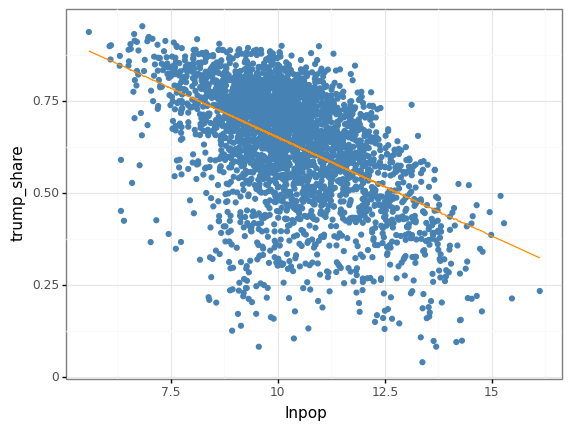

<ggplot: (8782386960101)>

In [61]:
(ggplot(df, aes(x='lnpop', y='trump_share'))+
       geom_point(color='steelblue')+
 geom_line(aes(x='lnpop', y='preds_reg4'), color='darkorange' )+
 theme_bw()
       )

In [62]:
regdf=reg4.conf_int()
regdf

,0,1
Intercept,1.153216e+00,1.221926e+00
income,-4.895979e-07,3.544809e-07
lnpop,-5.681555e-02,-4.982748e-02


In [63]:
regdf['betas']=reg4.params
regdf

,0,1,betas
Intercept,1.153216e+00,1.221926e+00,1.187571e+00
income,-4.895979e-07,3.544809e-07,-6.755851e-08
lnpop,-5.681555e-02,-4.982748e-02,-5.332152e-02


In [64]:
regdf.reset_index(inplace=True)
regdf.columns=['Variable','Lower_Bound', 'Upper_Bound', 'Beta']

In [65]:
regdf

,Variable,Lower_Bound,Upper_Bound,Beta
0,Intercept,1.153216e+00,1.221926e+00,1.187571e+00
1,income,-4.895979e-07,3.544809e-07,-6.755851e-08
2,lnpop,-5.681555e-02,-4.982748e-02,-5.332152e-02


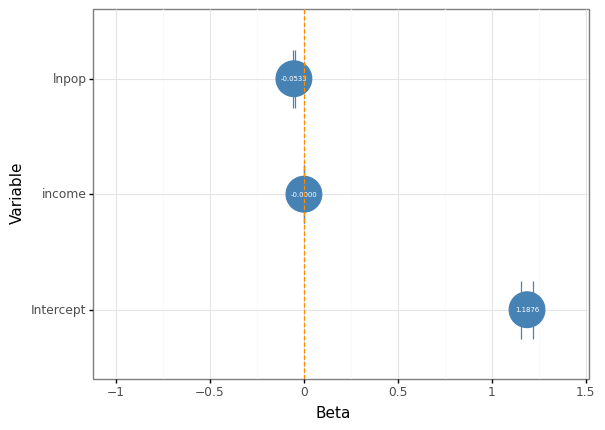

<ggplot: (8782357490201)>

In [66]:
#We could do a quick visualization of this for interpretation!
(ggplot(regdf, aes(y='Beta', x='Variable', label='Beta'))+
 
 
 geom_point(size=14, color='steelblue')+
 geom_errorbar(ymin=regdf['Lower_Bound'], ymax=regdf['Upper_Bound'],
              color='steelblue')+
 geom_text(format_string='{:.4f}', color='white', size=5)+
 ylim([-1, 1.4])+
 geom_hline(yintercept=0, linetype='dashed', color='darkorange')+
 coord_flip()+
 theme_bw()

)




The things that are difficult about this:


* Specifying a good relationship is hard!
* We don't know what other variables could be relevant!
* If we add everything but the kitchen sink, the R square goes up...but it doesn't mean that the model is better



The things that are great!

* Interpretation is simple!!! 

For 

$$y=\beta_0+\beta_1 X+\varepsilon$$


$$\beta_1=\frac{dy}{dx}$$

We can have statistical tests around our parameters!

